<b>研究谷歌股票交易策略</b>

In [1]:
import pandas as pd
import numpy as np

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

#### 谷歌股票分析

In [2]:
data = pd.read_csv('C:/Users/60448/Desktop/GOOGL.csv',
                   index_col=0,  # 第一列为索引
                   parse_dates=True)

data.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-01-08,1394.819946,1411.849976,1392.630005,1405.040039,1405.040039,1765700
2020-01-09,1421.930054,1428.680054,1410.209961,1419.790039,1419.790039,1660000
2020-01-10,1429.469971,1434.939941,1419.599976,1428.959961,1428.959961,1312900
2020-01-13,1435.250000,1441.479980,1425.369995,1440.030029,1440.030029,1536500
2020-01-14,1440.000000,1442.630005,1427.770020,1430.589966,1430.589966,1303800


##### 查看数据

In [3]:
stock = data['Close']
stock.describe()

count    3878.000000
mean      497.470483
std       345.230488
min        50.055054
25%       237.861618
50%       321.073577
75%       740.767502
max      1440.030029
Name: Close, dtype: float64

In [10]:
stock.index

DatetimeIndex(['2004-08-19', '2004-08-20', '2004-08-23', '2004-08-24',
               '2004-08-25', '2004-08-26', '2004-08-27', '2004-08-30',
               '2004-08-31', '2004-09-01',
               ...
               '2019-12-31', '2020-01-02', '2020-01-03', '2020-01-06',
               '2020-01-07', '2020-01-08', '2020-01-09', '2020-01-10',
               '2020-01-13', '2020-01-14'],
              dtype='datetime64[ns]', name='Date', length=3878, freq=None)

In [12]:
stock.values

array([  50.220219,   54.209209,   54.754753, ..., 1428.959961,
       1440.030029, 1430.589966])

In [14]:
stock.tail(10)

Date
2019-12-31    1339.390015
2020-01-02    1368.680054
2020-01-03    1361.520020
2020-01-06    1397.810059
2020-01-07    1395.109985
2020-01-08    1405.040039
2020-01-09    1419.790039
2020-01-10    1428.959961
2020-01-13    1440.030029
2020-01-14    1430.589966
Name: Close, dtype: float64

##### 绘制波动图

Populating the interactive namespace from numpy and matplotlib


C:\Users\60448\AppData\Local\Programs\Python\Python36\lib\site-packages\IPython\core\magics\pylab.py:160: UserWarning:

pylab import has clobbered these variables: ['plt', 'mpl', 're', 'sys']
`%matplotlib` prevents importing * from pylab and numpy



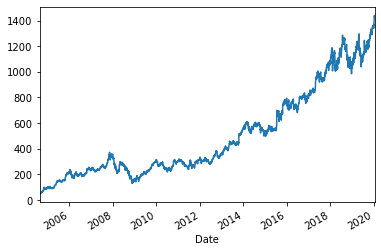

In [13]:
%pylab inline
stock.plot()

##### 基本分析

In [17]:
# 哪天是股价峰值，当天价格多少
stock.nlargest(1)

# 股价最高的十天
stock.nlargest(10)

Date
2020-01-13    1440.030029
Name: Close, dtype: float64

Date
2020-01-13    1440.030029
2020-01-14    1430.589966
2020-01-10    1428.959961
2020-01-09    1419.790039
2020-01-08    1405.040039
2020-01-06    1397.810059
2020-01-07    1395.109985
2020-01-02    1368.680054
2019-12-26    1362.469971
2020-01-03    1361.520020
Name: Close, dtype: float64

In [19]:
# 如果第一天买入，最后一天卖出，收益率是多少
(stock.values[-1] - stock.values[0]) / stock.values[0]

27.486334677274108

###### 计算移动平均数【rolling】

In [29]:
# 计算每50个交易日的移动平均数【rolling】
rol = stock.rolling(50)  # 动态信息存储为format
type(rol)
rol.mean()

pandas.core.window.Rolling

Date
2004-08-19            NaN
2004-08-20            NaN
2004-08-23            NaN
2004-08-24            NaN
2004-08-25            NaN
                 ...     
2020-01-08    1324.313599
2020-01-09    1326.929800
2020-01-10    1330.295798
2020-01-13    1333.882400
2020-01-14    1337.318198
Name: Close, Length: 3878, dtype: float64

###### 时移数

In [31]:
stock.shift(1)

Date
2004-08-19            NaN
2004-08-20      50.220219
2004-08-23      54.209209
2004-08-24      54.754753
2004-08-25      52.487488
                 ...     
2020-01-08    1395.109985
2020-01-09    1405.040039
2020-01-10    1419.790039
2020-01-13    1428.959961
2020-01-14    1440.030029
Name: Close, Length: 3878, dtype: float64

In [30]:
# 改变pandas展示列数
pd.set_option('display.max_rows',100)

##### 策略分析

###### 第一个策略，每五天卖出

<b>考虑这样的策略：买入股票五天后卖出，平均期望收益率大小</b>

In [35]:
future_price = stock.shift(-5)  # 未来价格映射到当天需回溯5天
profits = (future_price - stock) / stock  # 利润率
profits.mean()

0.005140156006489481

In [36]:
profits.describe()  # 策略描述

count    3873.000000
mean        0.005140
std         0.042254
min        -0.178787
25%        -0.017192
50%         0.005791
75%         0.026489
max         0.323724
Name: Close, dtype: float64

In [38]:
# 策略示例【假设每次买入100元】
100 * profits.mean() * (len(stock)-5)

1990.7824213133756

###### 第二个策略，高于交易期移动平均值买入，5个交易日卖出

<b>考虑这样的策略：每当价格高于20天移动平均值则买入，5个交易日后卖出</b>

In [85]:
#20天移动平均值
rol_20 = stock.rolling(20)  # 动态信息存储为format
rol_20.mean()

#购入日期的利率
profit = profits[stock>rol_20.mean()].mean()
profit

Date
2004-08-19            NaN
2004-08-20            NaN
2004-08-23            NaN
2004-08-24            NaN
2004-08-25            NaN
                 ...     
2020-01-08    1358.854504
2020-01-09    1362.699506
2020-01-10    1366.935004
2020-01-13    1371.512006
2020-01-14    1375.698004
Name: Close, Length: 3878, dtype: float64

0.0054315134689047195

In [87]:
len(profits[stock>rol_20.mean()])

2284

In [89]:
# 策略示例【假设始于100元】
100 * profit * (len(profits[stock>rol_20.mean()]))

1240.557676297838

###### 第三个策略，高于均线买入，低于均线卖出

Date
2004-08-19            NaN
2004-08-20            NaN
2004-08-23            NaN
2004-08-24            NaN
2004-08-25            NaN
                 ...     
2020-01-08    1358.854504
2020-01-09    1362.699506
2020-01-10    1366.935004
2020-01-13    1371.512006
2020-01-14    1375.698004
Name: Close, Length: 3878, dtype: float64

,stock,rol
Date,,
2019-12-31,1339.390015,1343.597491
2020-01-02,1368.680054,1347.294495
2020-01-03,1361.520020,1349.423499
2020-01-06,1397.810059,1352.966004
2020-01-07,1395.109985,1355.752002
2020-01-08,1405.040039,1358.854504
2020-01-09,1419.790039,1362.699506
2020-01-10,1428.959961,1366.935004
2020-01-13,1440.030029,1371.512006


<IPython.core.display.Javascript object>

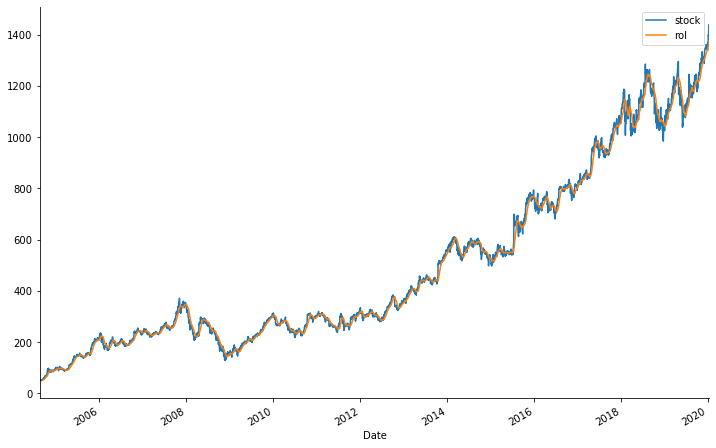

In [5]:
rol_20 = stock.rolling(20).mean()
rol_20
stock_table = pd.DataFrame({'stock':stock,'rol':rol_20})
stock_table.tail(10)

stock_table.plot(grid=False, figsize=(12,8))
sns.despine()

In [7]:
stock_table['ret'] = stock_table['stock'] -  stock_table['rol']

stock_table['signal'] = np.where(stock_table['ret'] > 0 , 1, 0)

stock_table.dropna(inplace=True)
stock_table.head(30)
stock_table['signal'].value_counts()

,stock,rol,ret,signal
Date,,,,
2004-09-16,57.042042,52.692943,4.349099,1
2004-09-17,58.803802,53.122122,5.681680,1
2004-09-20,59.739738,53.398648,6.341090,1
2004-09-21,58.978977,53.609860,5.369117,1
2004-09-22,59.249249,53.947948,5.301301,1
2004-09-23,60.470470,54.318818,6.151652,1
2004-09-24,59.974976,54.617117,5.357859,1
2004-09-27,59.189190,54.920170,4.269020,1
2004-09-28,63.493492,55.542041,7.951451,1


1    2284
0    1575
Name: signal, dtype: int64

In [159]:
stock_table['ret'].iloc[6]

5.35785935000002

In [168]:
test = [1,2,3]
for a in test:
    print(test.index(a))

0
1
2


In [174]:
# 错误的！！
buy_in = []
for i in stock_table['ret']:
    if i > 0:
        buy_in.append((stock_table['ret']==i).index)
        
buy_in[0]

In [182]:
sell = []
for i in stock_table['ret']:
    if i < 0:
        print(i)

-0.7354865999999873
-1.8305791999999883
-2.972223849999992
-3.7932948000000124
-6.730232200000003
-5.723475300000004
-7.317570099999983
-5.748999699999985
-1.8448431499999884
-1.9296750000000031
-2.687438
-1.1000964499999952
-1.706454000000008
-2.0180171500000057
-0.2822793500000387
-3.154651250000029
-6.7587624000000375
-8.190438550000025
-2.0362873000000263
-2.4962485500000327
-1.1834331000000304
-0.20295595000001754
-1.5748238000000327
-3.191441600000033
-3.28328405000002
-0.3108114500000312
-1.5405440500000225
-0.6704172500000283
-3.1941907000000214
-4.650398600000031
-3.5305317000000116
-4.257257550000034
-4.529526700000034
-3.139386600000023
-3.070318950000029
-1.2247287500000255
-2.7605079000000217
-4.2547591000000295
-4.650152650000024
-5.486485000000016
-6.582334400000008
-4.41066155
-5.425928099999993
-3.1006014999999962
-2.2782813999999973
-1.4306783499999938
-2.2522529499999706
-1.6874353000000042
-1.311061849999973
-0.11361054999997577
-0.8288260499999751
-0.24799864999998

-5.363354500000241
-0.6318924000002539
-5.680693600000268
-1.737235100000305
-6.361099100000217
-3.6268827000002375
-0.8408413500002325
-2.9241746000001854
-1.391134600000271
-1.9814954500001818
-0.4569638500001929
-1.14014560000021
-3.802794250000261
-2.6021075000002725
-27.348605700000235
-32.65390125000022
-32.445936250000216
-29.883143600000267
-29.50375690000027
-27.303060700000344
-26.623629600000356
-22.007014000000368
-16.62162595000035
-14.590098400000329
-14.943200600000296
-13.413406800000303
-18.450449000000333
-23.575575350000292
-16.159918500000288
-12.581814300000303
-13.865607100000261
-14.90590825000021
-15.115113850000228
-12.44469295000033
-1.2487306500003115
-0.07207445000028656
-1.8037873000002946
-0.44295240000030844
-3.4521899500003315
-1.420177950000209
-3.586598250000179
-5.279524100000174
-8.297551100000248
-8.630644100000154
-2.84760880000033
-1.1926860000002648
-0.05280795000021499
-2.1731661500002133
-2.9139250500001026
-3.7214734500001896
-2.88789340000022

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [178]:
sell

[DatetimeIndex(['2004-09-16', '2004-09-17', '2004-09-20', '2004-09-21',
                '2004-09-22', '2004-09-23', '2004-09-24', '2004-09-27',
                '2004-09-28', '2004-09-29',
                ...
                '2019-12-31', '2020-01-02', '2020-01-03', '2020-01-06',
                '2020-01-07', '2020-01-08', '2020-01-09', '2020-01-10',
                '2020-01-13', '2020-01-14'],
               dtype='datetime64[ns]', name='Date', length=3859, freq=None),
 DatetimeIndex(['2004-09-16', '2004-09-17', '2004-09-20', '2004-09-21',
                '2004-09-22', '2004-09-23', '2004-09-24', '2004-09-27',
                '2004-09-28', '2004-09-29',
                ...
                '2019-12-31', '2020-01-02', '2020-01-03', '2020-01-06',
                '2020-01-07', '2020-01-08', '2020-01-09', '2020-01-10',
                '2020-01-13', '2020-01-14'],
               dtype='datetime64[ns]', name='Date', length=3859, freq=None),
 DatetimeIndex(['2004-09-16', '2004-09-17', '2004-09

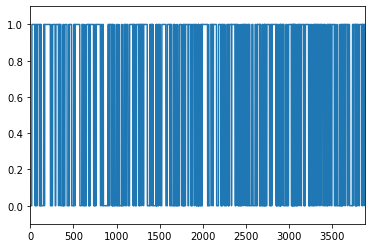

In [104]:
pd.Series(signal).plot(ylim=[-0.1,1.1])

#### 硅谷房价分析(对比谷歌股价)

In [55]:
df = pd.read_csv('C:/Users/60448/Desktop/santaclara_sfh.csv')
df['date'] = pd.to_datetime(df.date)
df['median_sfh_price_past_3_months']=df.median_sfh_price_past_3_months +0.0
df.set_index('date',inplace=True)
housing = df['median_sfh_price_past_3_months']
housing.name = 'housing'

In [56]:
df.head()

,median_sfh_price_past_3_months
date,
2012-01-31,485000.0
2012-02-29,528000.0
2012-03-31,568000.0
2012-04-30,620000.0
2012-05-31,630000.0


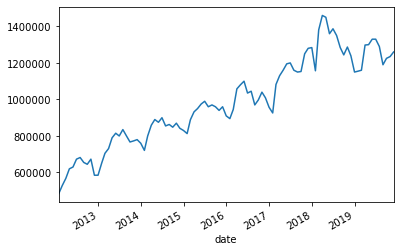

In [57]:
housing.plot()

##### 补齐股价非交易日的缺失值

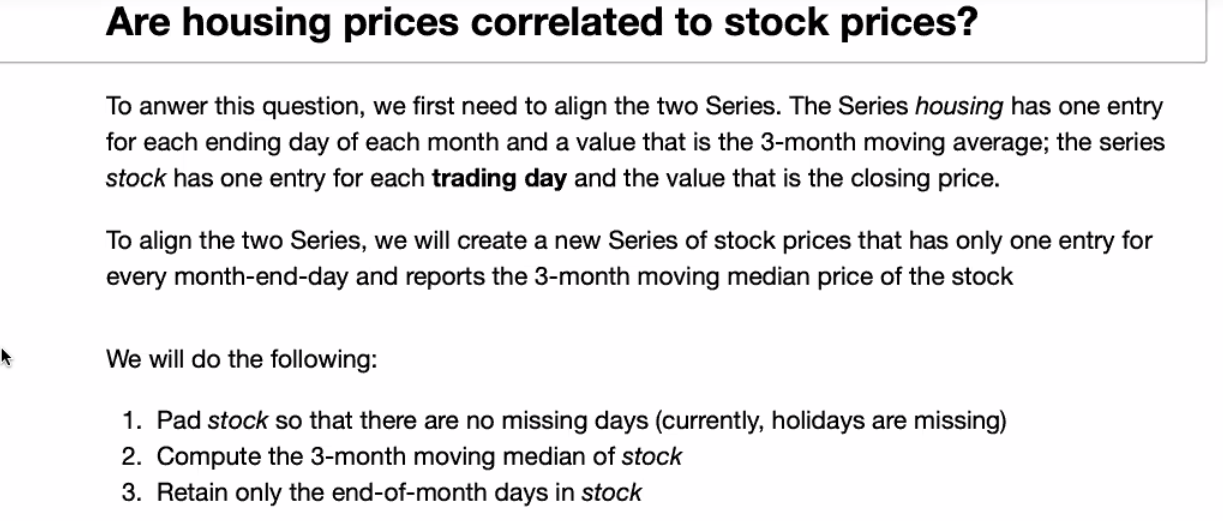

In [63]:
# 填充缺失值【asfreq】
padded = stock.asfreq(freq='1D', method='ffill')  #股票上前向填充是合理的
padded.head(20)

Date
2004-08-19    50.220219
2004-08-20    54.209209
2004-08-21    54.209209
2004-08-22    54.209209
2004-08-23    54.754753
2004-08-24    52.487488
2004-08-25    53.053055
2004-08-26    54.009010
2004-08-27    53.128128
2004-08-28    53.128128
2004-08-29    53.128128
2004-08-30    51.056057
2004-08-31    51.236237
2004-09-01    50.175175
2004-09-02    50.805805
2004-09-03    50.055054
2004-09-04    50.055054
2004-09-05    50.055054
2004-09-06    50.055054
2004-09-07    50.840839
Freq: D, Name: Close, dtype: float64

##### 房价是3个月中位数，所以要求出股价的90天中位数

In [68]:
movmed = padded.rolling(90).median()
movmed[80:120]

Date
2004-11-07          NaN
2004-11-08          NaN
2004-11-09          NaN
2004-11-10          NaN
2004-11-11          NaN
2004-11-12          NaN
2004-11-13          NaN
2004-11-14          NaN
2004-11-15          NaN
2004-11-16    66.356354
2004-11-17    66.976975
2004-11-18    67.647648
2004-11-19    68.153156
2004-11-20    68.688690
2004-11-21    68.851353
2004-11-22    68.933937
2004-11-23    68.933937
2004-11-24    69.094097
2004-11-25    69.374375
2004-11-26    69.904904
2004-11-27    70.417919
2004-11-28    70.795795
2004-11-29    71.599099
2004-11-30    72.127129
2004-12-01    72.127129
2004-12-02    73.085587
2004-12-03    74.349350
2004-12-04    74.709709
2004-12-05    78.698696
2004-12-06    83.238236
2004-12-07    83.848847
2004-12-08    83.933933
2004-12-09    84.224224
2004-12-10    84.597095
2004-12-11    84.759758
2004-12-12    84.759758
2004-12-13    84.772270
2004-12-14    84.784782
2004-12-15    84.784782
2004-12-16    84.929927
Freq: D, Name: Close, dtype: float6

##### 只保留月末的股价中值

In [71]:
# mask
housing.index
mod_stock = movmed[housing.index]
mod_stock.head(10)

DatetimeIndex(['2012-01-31', '2012-02-29', '2012-03-31', '2012-04-30',
               '2012-05-31', '2012-06-30', '2012-07-31', '2012-08-31',
               '2012-09-30', '2012-10-31', '2012-11-30', '2012-12-31',
               '2013-01-31', '2013-02-28', '2013-03-31', '2013-04-30',
               '2013-05-31', '2013-06-30', '2013-07-31', '2013-08-31',
               '2013-09-30', '2013-10-31', '2013-11-30', '2013-12-31',
               '2014-01-31', '2014-02-28', '2014-03-31', '2014-04-30',
               '2014-05-31', '2014-06-30', '2014-07-31', '2014-08-31',
               '2014-09-30', '2014-10-31', '2014-11-30', '2014-12-31',
               '2015-01-31', '2015-02-28', '2015-03-31', '2015-04-30',
               '2015-05-31', '2015-06-30', '2015-07-31', '2015-08-31',
               '2015-09-30', '2015-10-31', '2015-11-30', '2015-12-31',
               '2016-01-31', '2016-02-29', '2016-03-31', '2016-04-30',
               '2016-05-31', '2016-06-30', '2016-07-31', '2016-08-31',
      

date
2012-01-31    310.490479
2012-02-29    310.490479
2012-03-31    306.856857
2012-04-30    307.369873
2012-05-31    306.919419
2012-06-30    300.225219
2012-07-31    293.290802
2012-08-31    295.518006
2012-09-30    335.017517
2012-10-31    342.887878
Name: Close, dtype: float64

##### 计算相关性

In [72]:
housing.corr(mod_stock)

0.9465998860226293

###### 绘制相关曲线

In [73]:
import matplotlib.pyplot as plt

<b>解决量纲问题</b>

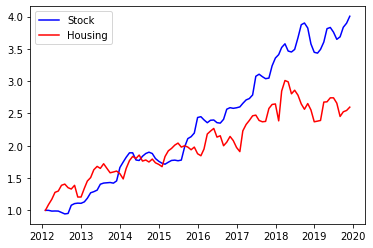

In [78]:
norm_stock = mod_stock/mod_stock[0]
norm_housing = housing/housing.iloc[0]

plt.plot(norm_stock,'b')
plt.plot(norm_housing,'r')
# 插入图例
plt.legend(['Stock','Housing'])